NYC Food Accessibility 
Euclidean vs Network Distance (from my old apartment in parkslope to my old keyfood)

In [2]:
!pip install osmnx networkx geopy

  Using cached osmnx-2.0.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached geopy-2.4.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached geographiclib-2.0-py3-none-any.whl.metadata (1.4 kB)
Using cached osmnx-2.0.5-py3-none-any.whl (101 kB)
Using cached geopy-2.4.1-py3-none-any.whl (125 kB)
Using cached geographiclib-2.0-py3-none-any.whl (40 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [osmnx]


In [13]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from geopy.distance import geodesic

In [5]:
place_name = "Park Slope, Brooklyn, New York, USA"

G = ox.graph_from_place(place_name, network_type="walk", simplify=True)

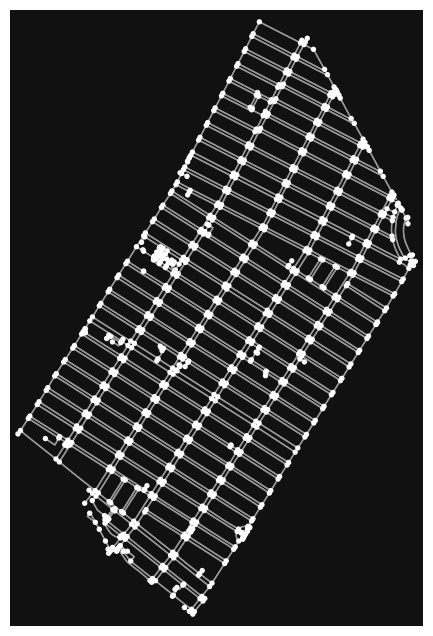

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [6]:
ox.plot_graph(G)

In [33]:
home = (40.6692346, -73.9765732)
grocery = (40.673174, -73.9768226)

In [ ]:
home_node = ox.distance.nearest_nodes(G, home[1], home[0])
grocery_node = ox.distance.nearest_nodes(G, grocery[1], grocery[0])

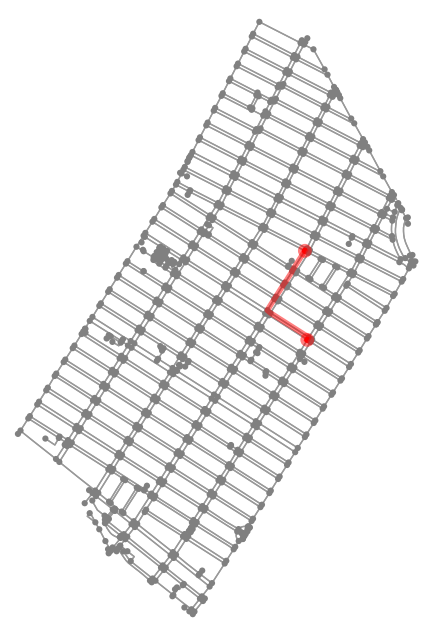

In [85]:
nodes = list(G.nodes)
home_idx = nodes.index(home_node)
grocery_idx = nodes.index(grocery_node)

node_colors = ["gray" for _ in nodes]
node_colors[home_idx] = "red"
node_colors[grocery_idx] = "red"


route = shortest_path
route_edges = list(zip(route[:-1], route[1:]))

fig, ax = ox.plot_graph_routes(
    G,
    routes=[route],
    route_color="orange",
    route_linewidth=3,
    node_color=node_colors,
    node_size=20,
    edge_color="#999999",
    bgcolor="white",
    show=True,
    close=True,
)

In [86]:
euclidean_distance = geodesic(home, grocery).miles
shortest_path = nx.shortest_path(G, home_node, grocery_node, weight="length")

In [87]:
network_distance_meters = 0
for u, v in zip(shortest_path[:-1], shortest_path[1:]):
    edge_data = G.get_edge_data(u, v)
    if isinstance(edge_data, dict):
        edge_length = edge_data[0]["length"]
    else:
        edge_length = edge_data["length"]
    network_distance_meters += edge_length
network_distance_miles = network_distance_meters / 1609.34

print(f"Euclidean Distance: {euclidean_distance:.3f} miles")
print(f"Network Distance: {network_distance_miles:.3f} miles")

Euclidean Distance: 0.272 miles
Network Distance: 0.364 miles


This map traces a familiar daily route from my previous home in Park Slope, Brooklyn, to the nearby Key Food grocery store. While the distance may seem short, returning with heavy bags was often challenging—the final block leading home is a steep uphill slope. This small yet persistent incline became a tangible reminder of how the urban landscape shapes everyday routines, revealing the embodied dimension of seemingly mundane paths.